In [1]:
import pandas as pd
churn_data= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
churn_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Need to check why there are three values for the following:
- MultipleLines          
- InternetService        
- OnlineSecurity         
- OnlineBackup           
- DeviceProtection       
- TechSupport            
- StreamingTV            
- StreamingMovies        
- Contract
- PaymentMethod               

In [4]:
lists = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for i in lists:
    print(churn_data[i].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [5]:
churn_data['gender'].replace({"Male": 1, "Female": 0}, inplace= True) #Male=1
churn_data['Partner'].replace({"Yes": 1, "No": 0}, inplace= True) # Yes=1
churn_data['Dependents'].replace({"Yes": 1, "No": 0}, inplace= True)
churn_data['PhoneService'].replace({"Yes": 1, "No": 0}, inplace= True)   
churn_data['PaperlessBilling'].replace({"Yes": 1, "No": 0}, inplace= True)
churn_data['Churn'].replace({"Yes": 1, "No": 0}, inplace= True)

In [6]:
churn_data['MultipleLines'].replace({"Yes": 1, "No": 0, "No phone service": 2}, inplace= True)
churn_data['InternetService'].replace({"Fiber optic": 1, "No": 0 , "DSL": 2}, inplace= True)
churn_data['Contract'].replace({"Month-to-month": 1, "One year": 0, "Two year": 2}, inplace= True)
churn_data['PaymentMethod'].replace({"Electronic check": 1, "Mailed check": 0, "Bank transfer (automatic)": 2,"Credit card (automatic)":3 }, inplace= True)
columns_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
replacement_dict = {"Yes": 1, "No": 0, "No internet service": 2}
churn_data[columns_to_replace] = churn_data[columns_to_replace].applymap(lambda x: replacement_dict.get(x, x))


In [7]:
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,2,0,...,0,0,0,0,1,1,1,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,2,1,...,1,0,0,0,0,0,0,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,2,1,...,0,0,0,0,1,1,0,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,2,1,...,1,1,0,0,0,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,1,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,2,1,...,1,1,1,1,0,1,0,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,1,0,...,1,0,1,1,0,1,3,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,2,2,1,...,0,0,0,0,1,1,1,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,1,0,...,0,0,0,0,1,1,0,74.40,306.6,1


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,fmt='d', ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes']) 
    plt.show() 

C:\Users\User-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\User-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.

### Logistic Regression

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7988995385161519


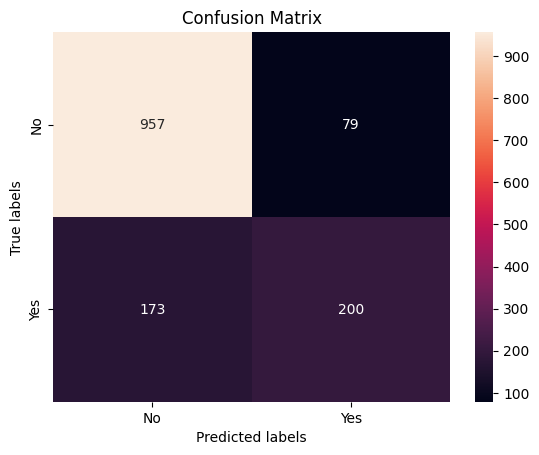

In [9]:

y= churn_data['Churn']
X= churn_data.iloc[:, 1:-2]
transform = preprocessing.StandardScaler()
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr= LogisticRegression()
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
gscv=GridSearchCV(lr,parameters,scoring='accuracy',cv=10)
logreg_cv=gscv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)
logreg_cv.score(X_test, y_test)
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7988995385161519



### Support Vector Machine

In [10]:
# this takes too long remove some parameters
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
rscv = RandomizedSearchCV(svm,parameters,scoring='accuracy',cv=10, n_iter=10, random_state=42,n_jobs=-1 )
svm_cv = rscv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
svm_cv.score(X_test, y_test)
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)

### Decision Tree


Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.7847000354987576


[Parallel(n_jobs=1)]: Done 6480 out of 6480 | elapsed:   22.1s finished


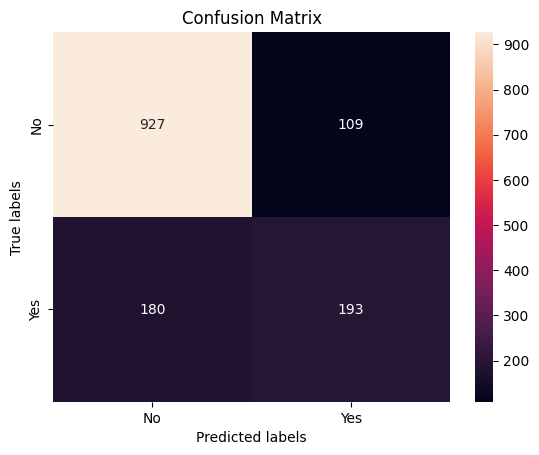

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
gst = GridSearchCV(tree,parameters,scoring='accuracy',cv=10,verbose=1)
tree_cv = gst.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)
tree_cv.score(X_test, y_test)
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)


tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.7896698615548455

### KNN

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.7749378771742989


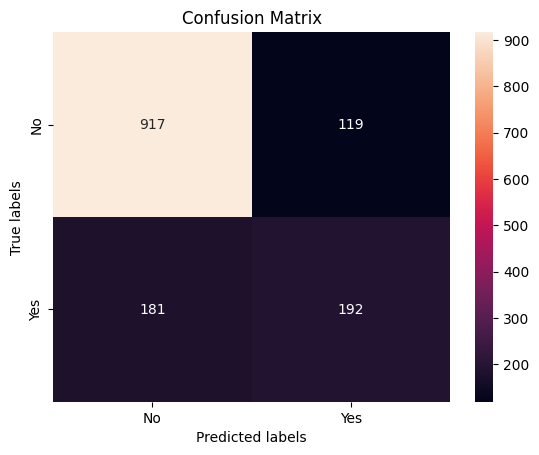

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knngs = GridSearchCV(KNN,parameters,scoring='accuracy',cv=10)
knn_cv = knngs.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
knn_cv.score(X_test, y_test)
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test,yhat)
# might take a while (around 6mins)

In [ ]:
# performance on our data
print('Logistics Regression method:', logreg_cv.score(X_test, y_test))
print('Decision tree method:', tree_cv.score(X_test, y_test))
print('K nearsdt neighbors method:', knn_cv.score(X_test, y_test))
# performance with cross validation
print('#'*80)
print('Logistics Regression method:', logreg_cv.best_score_)
print('Decision tree method:', tree_cv.best_score_)
print('K nearsdt neighbors method:', knn_cv.best_score_)

Logistics Regression method: 0.8211497515968772
Decision tree method: 0.794889992902768
K nearsdt neighbors method: 0.78708303761533
################################################################################
Logistics Regression method: 0.7988995385161519
Decision tree method: 0.7847000354987576
K nearsdt neighbors method: 0.7749378771742989


Best performer here is the logistic regression